In [ ]:
import os

import pandas as pd
import polars as pl
import matplotlib

# import kaggle_evaluation.jane_street_inference_server

In [ ]:
input_path = '../data'
feature_path = "features.csv"
responders_path = "responders.csv"
sample_submission_path = "sample_submission.csv"

feature_df = pd.read_csv(os.path.join(input_path, feature_path))                            # (79, 18)
responders_df = pd.read_csv(os.path.join(input_path, responders_path))                      # (9, 6)
sample_submission_data = pd.read_csv(os.path.join(input_path, sample_submission_path))      # (39, 2)
df_partition0 = pd.read_parquet(os.path.join(input_path, 'train.parquet/partition_id=0'))   # (N, 92)

In [ ]:
lags_data_path = "../data/lags.parquet/date_id=0/part-0.parquet"    # lags 数据路径
test_data_path = "/home/kyletian/kaggle/jane-street-project/data/test.parquet/date_id=0/part-0.parquet"
lags_data = pd.read_parquet(lags_data_path)
test_data = pd.read_parquet(test_data_path)
print(lags_data.shape)
print(test_data.shape)

In [ ]:
print(lags_data.columns)

In [6]:
print(feature_df.shape)
print(responders_df.shape)
print(sample_submission_data.columns)
print(df_partition0.shape)

(79, 18)
(9, 6)
Index(['row_id', 'responder_6'], dtype='object')
(1944210, 92)


In [7]:
print(df_partition0['symbol_id'])
print(df_partition0['date_id'])
print(df_partition0['time_id'])

0           1
1           7
2           9
3          10
4          14
           ..
1944205    19
1944206    30
1944207    33
1944208    34
1944209    38
Name: symbol_id, Length: 1944210, dtype: int8
0            0
1            0
2            0
3            0
4            0
          ... 
1944205    169
1944206    169
1944207    169
1944208    169
1944209    169
Name: date_id, Length: 1944210, dtype: int16
0            0
1            0
2            0
3            0
4            0
          ... 
1944205    848
1944206    848
1944207    848
1944208    848
1944209    848
Name: time_id, Length: 1944210, dtype: int16


<Axes: >

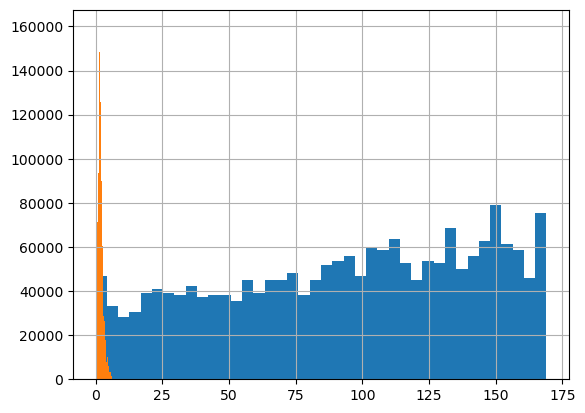

In [8]:
# date_id 的直方图
df_partition0['date_id'].hist(bins=40)
# time_id 的直方图
df_partition0['weight'].hist(bins=40)

In [9]:
#* 验证数据行的唯一性
# 比较去重后的数量与总行数
total_rows = len(df_partition0)
unique_combinations = len(df_partition0[['symbol_id', 'date_id', 'time_id']].drop_duplicates())

print(f"总行数: {total_rows}")
print(f"唯一组合数: {unique_combinations}")
print(f"是否完全唯一: {total_rows == unique_combinations}")

总行数: 1944210
唯一组合数: 1944210
是否完全唯一: True


In [10]:
total_symbols = df_partition0['symbol_id'].nunique()
total_dates = df_partition0['date_id'].nunique()
total_times = df_partition0['time_id'].nunique()

theoretical_tota = total_symbols * total_dates * total_times
all_data_rows = len(df_partition0)
print(f"唯一 symbol_id 的个数：{total_symbols}")
print(f"唯一 date_id 的个数: {total_dates}")
print(f"唯一 time_id 的个数: {total_times}")
print(f"有 symbol_id 占总体数据的比例: {all_data_rows / theoretical_tota * 100:.2f}%")

唯一 symbol_id 的个数：20
唯一 date_id 的个数: 170
唯一 time_id 的个数: 849
有 symbol_id 占总体数据的比例: 67.35%


In [11]:
print(df_partition0['symbol_id'].unique())

[ 1  7  9 10 14 16 19 33  0  2 13 15 38  3 12  8 17 34 11 30]


In [12]:
time_ids = sorted(df_partition0['time_id'].unique())
time_intervals = [time_ids[i+1] - time_ids[i] for i in range(len(time_ids)-1)]

all_time_intervals = set(time_intervals)

print("相邻 time_id 的差值：")
print(all_time_intervals)

相邻 time_id 的差值：
{1}
